In [8]:
import os
import sys

import logging
from pathlib import Path

import click
import pandas as pd
import numpy as np

sys.path.append(r"c:\Users\zach_\Desktop\Research\Github\RFE_project\src")
from utility import parse_config, set_logger

In [5]:
config = parse_config(r"c:\Users\zach_\Desktop\Research\Github\RFE_project\src\config.yaml")

In [6]:
data_file_path = Path(config["data"]["data_file_path"])
regdata_path = Path(config["data"]["regdata_path"])
data_file_path

KeyError: 'data'

In [8]:
config["make_data"]["data_file_path"]

'C:/Users/zach_/Nobackupfile/Data/BDS'

In [10]:
df = pd.read_csv(data_file_path/regdata_path)

NameError: name 'data_file_path' is not defined

In [11]:
df.head()

NameError: name 'df' is not defined

In [60]:
# load data paths
data_file_path = Path(config["data"]["data_file_path"])
regdata_path = Path(config["data"]["regdata_path"])
bds_naics_4_path = Path(config["data"]["bds_naics_4_path"])
gdp_path = Path(config["data"]["bds_naics_4_path"])

# reg data
regdata = pd.read_csv(data_file_path/regdata_path)
regdata['sector_reg'] = regdata['NAICS']
regdata = regdata.loc[:,["year", "sector_reg", "industry_restrictions_1_0", "industry_restrictions_2_0"]]

# sector gdp data
gdp = pd.read_csv(data_file_path/gdp_path)
gdp = pd.melt(gdp, id_vars='sector_2', var_name='year', value_name='gdp')
gdp['year'] = pd.to_numeric(gdp['year']).astype(np.int64)

# load BDS dataset by age sector
df = pd.read_csv(data_file_path/bds_naics_4_path)

KeyError: 'sector_2'

In [61]:
gdp.head()

,year,sector,fage,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1978,1100,a) 0,3911,3919,16879,8440,3919,200,(X),...,(X),(X),(X),(X),16879,200,(X),(X),(X),(X)
1,1978,1100,b) 1,3043,3075,16199,17413,15,0.402,1334,...,5709,2637,32.787,47.931,-2342,-13.45,68.962,1019,1030,4821
2,1978,1100,c) 2,(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,1978,1100,d) 3,(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,1978,1100,e) 4,(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [1]:
list = ["a", "b"]
list.append("c")

In [2]:
list

['a', 'b', 'c']

In [3]:
list1 = ["c"]

In [4]:
list1 + list

['c', 'a', 'b', 'c']

In [5]:
[list1,list]

[['c'], ['a', 'b', 'c']]

In [6]:
['f'] + list

['f', 'a', 'b', 'c']

In [2]:
import requests

In [37]:
userkey = "1d269ace47b83d5bfe0677f78511c97c7f245699"
api_text = f"https://api.census.gov/data/timeseries/bds?get=FIRM,FIRMDEATH_FIRMS&for=state:*&YEAR=*&NAICS=*&INDLEVEL=2&EMPSZFI=*&FAGE=*&key={userkey}"
api_url = api_text
api_url

'https://api.census.gov/data/timeseries/bds?get=FIRM,FIRMDEATH_FIRMS&for=state:*&YEAR=*&NAICS=*&INDLEVEL=2&EMPSZFI=*&FAGE=*&key=1d269ace47b83d5bfe0677f78511c97c7f245699'

In [38]:
response = requests.get(api_url)
response.json()

[['FIRM',
  'FIRMDEATH_FIRMS',
  'YEAR',
  'NAICS',
  'INDLEVEL',
  'EMPSZFI',
  'FAGE',
  'state'],
 ['2623', '0', '2010', '00', '2', '001', '010', '28'],
 ['2090', '503', '2010', '00', '2', '001', '020', '28'],
 ['2166', '379', '2010', '00', '2', '001', '030', '28'],
 ['2096', '327', '2010', '00', '2', '001', '040', '28'],
 ['1782', '256', '2010', '00', '2', '001', '050', '28'],
 ['1680', '183', '2010', '00', '2', '001', '060', '28'],
 ['9814', '1648', '2010', '00', '2', '001', '065', '28'],
 ['6893', '543', '2010', '00', '2', '001', '070', '28'],
 ['16793', '879', '2010', '00', '2', '001', '075', '28'],
 ['5351', '363', '2010', '00', '2', '001', '080', '28'],
 ['3953', '195', '2010', '00', '2', '001', '090', '28'],
 ['3215', '153', '2010', '00', '2', '001', '100', '28'],
 ['4274', '168', '2010', '00', '2', '001', '110', '28'],
 ['5990', '193', '2010', '00', '2', '001', '150', '28'],
 ['3781', '582', '2010', '44-45', '2', '612', '001', '28'],
 ['1499', '40', '2010', '44-45', '2', '62

In [39]:
import os

from dotenv import load_dotenv, find_dotenv

dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)
database_url = os.environ.get("DATABASE_URL")

response = requests.get(api_url)
df_json = response.json()

In [40]:
df = pd.DataFrame(df_json, header = 0)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'header'

In [ ]:
df
new_header = df.iloc[0] 
df = df[1:]
df.columns = new_header

In [36]:
df.replace({'a': 'x', 'b': 'y', 'c': 'w', 'd': 'z'})

,JOB_CREATION,YEAR,NAICS,INDLEVEL,EMPSZFI,FAGE,state
1,17350,2010,00,2,001,010,28
2,2629,2010,00,2,001,020,28
3,3020,2010,00,2,001,030,28
4,2165,2010,00,2,001,040,28
5,3051,2010,00,2,001,050,28
...,...,...,...,...,...,...,...
1199516,347,2011,61,2,001,080,27
1199517,573,2011,61,2,001,090,27
1199518,228,2011,61,2,001,100,27
1199519,256,2011,61,2,001,110,27


In [61]:
coef = []
dict = {}
dict.update({1:"like"})
coef.append(dict)

dict.update({1:"like2"})
coef.append(dict)

In [62]:
df =pd.DataFrame(coef)

In [63]:
df.to_csv()

',1\r\n0,like2\r\n1,like2\r\n'

In [64]:
df

,1
0,like2
1,like2


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plot
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [14]:
pwd(0)

'c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\notebooks'

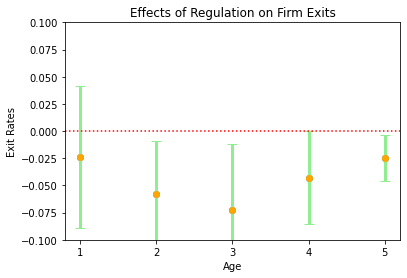

In [15]:
df = pd.read_csv("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\tables\\results_cohort_age_LP_death_rate.csv")
Age = df.age.to_numpy().T
Age = Age.astype(int)
Coef = df.Coef.to_numpy().T 
lower_ci = - df[["lower_ci"]].to_numpy().T + df.Coef.to_numpy().T 
upper_ci = df[["upper_ci"]].to_numpy().T - df.Coef.to_numpy().T 
yerr = np.vstack((lower_ci, upper_ci))

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([-0.1, 0.1])
ax.scatter(Age, Coef)
ax.errorbar(Age, Coef, yerr = yerr, fmt = 'o',color = 'orange', 
            ecolor = 'lightgreen', elinewidth = 3, capsize=5)
ax.axhline(y=0, color='r', linestyle=':')
ax.set_title("Effects of Regulation on Firm Exits")
ax.set_xlabel("Age")
ax.set_ylabel("Exit Rates")

plt.savefig("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\figs\\results_cohort_age_LP_death_rate.png")
plt.show()

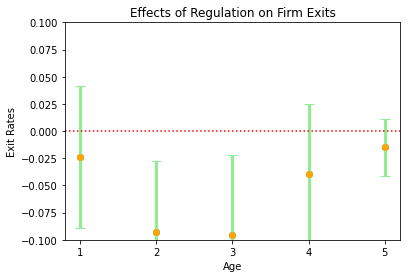

In [16]:
df = pd.read_csv("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\tables\\results_path_age_LP_death_rate.csv")
Age = df.age.to_numpy().T
Age = Age.astype(int)
Coef = df.Coef.to_numpy().T 
lower_ci = - df[["lower_ci"]].to_numpy().T + df.Coef.to_numpy().T 
upper_ci = df[["upper_ci"]].to_numpy().T - df.Coef.to_numpy().T 
yerr = np.vstack((lower_ci, upper_ci))


fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([-0.1, 0.1])
ax.scatter(Age, Coef)
ax.errorbar(Age, Coef, yerr = yerr, fmt = 'o',color = 'orange', 
            ecolor = 'lightgreen', elinewidth = 3, capsize=5)
ax.axhline(y=0, color='r', linestyle=':')
ax.set_title("Effects of Regulation on Firm Exits")
ax.set_xlabel("Age")
ax.set_ylabel("Exit Rates")

plt.savefig("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\figs\\results_path_age_LP_death_rate.png")
plt.show()

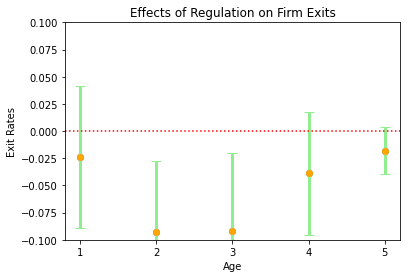

In [17]:
df = pd.read_csv("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\tables\\results_average_cohort_inc_age_LP_death_rate.csv")
Age = df.age.to_numpy().T
Age = Age.astype(int)
Coef = df.Coef.to_numpy().T 
lower_ci = - df[["lower_ci"]].to_numpy().T + df.Coef.to_numpy().T 
upper_ci = df[["upper_ci"]].to_numpy().T - df.Coef.to_numpy().T 
yerr = np.vstack((lower_ci, upper_ci))


fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([-0.1, 0.1])
ax.scatter(Age, Coef)
ax.errorbar(Age, Coef, yerr = yerr, fmt = 'o',color = 'orange', 
            ecolor = 'lightgreen', elinewidth = 3, capsize=5)
ax.axhline(y=0, color='r', linestyle=':')
ax.set_title("Effects of Regulation on Firm Exits")
ax.set_xlabel("Age")
ax.set_ylabel("Exit Rates")

plt.savefig("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\figs\\results_average_cohort_inc_age_LP_death_rate.png")
plt.show()

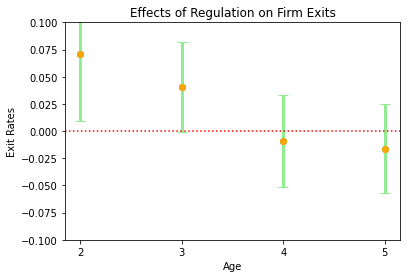

In [18]:
df = pd.read_csv("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\tables\\results_average_cohort_inc_age_LP_2_death_rate.csv")
Age = df.age.to_numpy().T
Age = Age.astype(int)
Coef = df.Coef.to_numpy().T 
lower_ci = - df[["lower_ci"]].to_numpy().T + df.Coef.to_numpy().T 
upper_ci = df[["upper_ci"]].to_numpy().T - df.Coef.to_numpy().T 
yerr = np.vstack((lower_ci, upper_ci))


fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim([-0.1, 0.1])
ax.scatter(Age, Coef)
ax.errorbar(Age, Coef, yerr = yerr, fmt = 'o',color = 'orange', 
            ecolor = 'lightgreen', elinewidth = 3, capsize=5)
ax.axhline(y=0, color='r', linestyle=':')
ax.set_title("Effects of Regulation on Firm Exits")
ax.set_xlabel("Age")
ax.set_ylabel("Exit Rates")

plt.savefig("c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\results\\figs\\results_average_cohort_inc_age_LP_2_death_rate.png")
plt.show()

In [156]:
upper_ci

array([[0.06239586, 0.04366353, 0.03839887, 0.03667666]])

In [ ]:

shifted = df.groupby(level="grp").shift(-1)
df.join(shifted.rename(columns=lambda x: x+"_lag"))

In [ ]:

regdata = pd.read_csv('C:\\Users\\zach_\\Nobackupfile\\Data\\BDS\\Regdata\\regdata_4_0_industries.csv')


In [1]:
import pandas as pd

In [52]:
df = pd.read_csv('C:\\Users\\zach_\\Nobackupfile\\Data\\BDS\\Regdata\\regdata_4_0_industries.csv')
time_var = ["year"]
id_var = ["NAICS"]
var = ["industry_restrictions_1_0"]
lags = -1
index = time_var + id_var
columns = time_var + id_var + var

df_shift = df[columns].set_index(index_var)
df_shift.head()
shifted = df_shift.groupby(level=id_var).shift(-1)

df_shift.join(shifted.rename(columns=lambda x: x+"_lag"))

industry_restrictions_1_0  industry_restrictions_1_0_lag
year NAICS                                                          
1970 11                  26906.195560                   29334.040140
     21                   2796.801590                    3341.437711
     22                   4070.888044                    4696.538357
     31                  41761.877750                   39947.657040
     42                    995.916204                    1072.167503
...                               ...                            ...
2020 6243                21813.640410                            NaN
     7121                19275.208430                            NaN
     7139                  746.758602                            NaN
     8131                20394.695870                            NaN
     9281                14175.866100                            NaN

[9792 rows x 2 columns]

ModuleNotFoundError: No module named 'src.utility'

In [4]:
file_name = "bds2019_naics_4_age"
file_address = f"C:\\Users\\zach_\\Nobackupfile\\Data\\BDS\\{file_name}.csv"
df = pd.read_csv(file_address)
print(df.shape)
time_var = ["year"]
id_var = ["sector", "fage"]
var = ["emp"]
lags = 2

def lag_variable_1(df, time_var, id_var, var, lags):
    """
    lag_variable create lag variables by groups   
    Args:
        df [DataFrame]: dataframe
        time_var [int]: time variable
        id_var: id variable
        var: lagged variable
        lags: number of lags (1 means one lag)
    """

    
    return df


index_var = time_var + id_var

df = df.set_index(index_var)
df_shift = df[var]

var_name = var[0]
shifted = df_shift.groupby(level=id_var).shift(-lags)
shifted = shifted.rename(columns={var_name: f"L_{lags}_{var_name}"})
df = df.join(shifted, validate="one_to_one")
df = df.reset_index()
#time_var + id_var
#df = lag_variable_1(df, time_var, id_var, var, lags)

print(df.shape)
shifted

(141624, 27)


TypeError: DataFrame.join() got an unexpected keyword argument 'validate'

In [33]:
index_var = time_var + id_var
df = df.set_index(index_var)
df_shift = df[var]

fage firms estabs    emp denom estabs_entry estabs_entry_rate  \
year sector                                                                  
1978 1100    a) 0  3911   3919  16879  8440         3919               200   
     1100    a) 0  3911   3919  16879  8440         3919               200   
     1100    a) 0  3911   3919  16879  8440         3919               200   
     1100    a) 0  3911   3919  16879  8440         3919               200   
     1100    a) 0  3911   3919  16879  8440         3919               200   

            estabs_exit estabs_exit_rate job_creation  ...  \
year sector                                            ...   
1978 1100           (X)              (X)        16879  ...   
     1100           (X)              (X)        16879  ...   
     1100           (X)              (X)        16879  ...   
     1100           (X)              (X)        16879  ...   
     1100           (X)              (X)        16879  ...   

            job_destruction_continuers job_destruction_rate_deaths  \
year sector                                                          
1978 1100                          (X)                         (X)   
     1100                          (X)                         (X)   
     1100                          (X)                         (X)   
     1100                          (X)                         (X)   
     1100                          (X)                         (X)   

            job_destruction_rate net_job_creation net_job_creation_rate  \
year sector                                                               
1978 1100                    (X)            16879                   200   
     1100                    (X)            16879                   200   
     1100                    (X)            16879                   200   
     1100                    (X)            16879                   200   
     1100                    (X)            16879                   200   

            reallocation_rate firmdeath_firms firmdeath_estabs firmdeath_emp  \
year sector                                                                    
1978 1100                 (X)             (X)              (X)           (X)   
     1100                 (X)             (X)              (X)           (X)   
     1100                 (X)             (X)              (X)           (X)   
     1100                 (X)             (X)              (X)           (X)   
     1100                 (X)             (X)              (X)           (X)   

            L_2_emp  
year sector          
1978 1100       (X)  
     1100       (X)  
     1100       (X)  
     1100       (X)  
     1100       (X)  

[5 rows x 26 columns]

In [35]:
df_shift = df[var]
df_shift.head()

emp
year sector       
1978 1100    16879
     1100    16879
     1100    16879
     1100    16879
     1100    16879

In [39]:
    
var_name = var[0]

shifted = df_shift.groupby(level=id_var).shift(-lags)
shifted = shifted.rename(columns={var_name: f"L_{1}_{var_name}"})

In [41]:
df = df.join(shifted)

MemoryError: Unable to allocate 47.4 GiB for an array with shape (26, 244726272) and data type object

In [2]:
sys.path.append(r"c:\Users\zach_\Desktop\Research\Github\RFE_project\src")
import pandas as pd
from utility import lag_variable

from utility import parse_config


In [111]:
sys.path.append(r"c:\Users\zach_\Desktop\Research\Github\RFE_project\src")
from make_data import data_load

In [113]:
config_file = "c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project\\src\\config.yaml"
config = parse_config(config_file)
df_sec_sz_ag, df_sec_ag, regdata, gdp = data_load(config)

KeyError: "['year', 'sector'] not in index"

In [63]:
df.head()

industry_restrictions_1_0
year NAICS                           
1970 11                  26906.195560
     21                   2796.801590
     22                   4070.888044
     31                  41761.877750
     42                    995.916204

In [41]:
print(shifted.loc[1970, 11])

industry_description         Agriculture Forestry Fishing and Hunting
industry_restrictions_1_0                                 29334.04014
industry_restrictions_2_0                                 31330.17984
Name: (1970, 11), dtype: object


In [43]:
print(regdata.loc[1971, 11])

industry_description         Agriculture Forestry Fishing and Hunting
industry_restrictions_1_0                                 29334.04014
industry_restrictions_2_0                                 31330.17984
Name: (1971, 11), dtype: object
